In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import datetime as dt
from IPython.display import display
#Setting max displayed columns to 100
pd.options.display.max_columns = 100
#For vizualisation of the data
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#To remove the warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Checking the version of Tensorflow
tf.__version__

'2.9.2'

In [3]:
#Importing the dataset

from datetime import datetime
dateparse = lambda x: pd.datetime.strptime(x,'%Y-%m-%d')

Test= pd.read_csv('/content/Google_Stock_Price_Test.csv',parse_dates=['Date'], date_parser=dateparse)
Train = pd.read_csv('/content/Google_Stock_Price_Train.csv',parse_dates=['Date'], date_parser=dateparse)
Test.head()

,Date,Open,High,Low,Close,Volume
0,2017-01-03,778.81,789.63,775.80,786.14,1657300
1,2017-01-04,788.36,791.34,783.16,786.90,1073000
2,2017-01-05,786.08,794.48,785.02,794.02,1335200
3,2017-01-06,795.26,807.90,792.20,806.15,1640200
4,2017-01-09,806.40,809.97,802.83,806.65,1272400


In [4]:
Test = Test.sort_values('Date')

In [5]:
Test.dtypes

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume             int64
dtype: object

In [6]:
Train = Train.sort_values('Date')

In [7]:
Train.dtypes

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume             int64
dtype: object

Concatenate the 2 files for data Cleaning

In [8]:
df = pd.concat([Train,Test])

In [9]:
df.head()

,Date,Open,High,Low,Close,Volume
0,2012-01-03,325.25,332.83,324.97,663.59,7380500
1,2012-01-04,331.27,333.87,329.08,666.45,5749400
2,2012-01-05,329.83,330.75,326.89,657.21,6590300
3,2012-01-06,328.34,328.77,323.68,648.24,5405900
4,2012-01-09,322.04,322.29,309.46,620.76,11688800


In [10]:
df.tail()

,Date,Open,High,Low,Close,Volume
15,2017-01-25,829.62,835.77,825.06,835.67,1494500
16,2017-01-26,837.81,838.00,827.01,832.15,2973900
17,2017-01-27,834.71,841.95,820.44,823.31,2965800
18,2017-01-30,814.66,815.84,799.80,802.32,3246600
19,2017-01-31,796.86,801.25,790.52,796.79,2160600


In [11]:
len(df)

1278

In [12]:
df.shape

(1278, 6)

In [13]:
df.info

<bound method DataFrame.info of          Date    Open    High     Low   Close    Volume
0  2012-01-03  325.25  332.83  324.97  663.59   7380500
1  2012-01-04  331.27  333.87  329.08  666.45   5749400
2  2012-01-05  329.83  330.75  326.89  657.21   6590300
3  2012-01-06  328.34  328.77  323.68  648.24   5405900
4  2012-01-09  322.04  322.29  309.46  620.76  11688800
..        ...     ...     ...     ...     ...       ...
15 2017-01-25  829.62  835.77  825.06  835.67   1494500
16 2017-01-26  837.81  838.00  827.01  832.15   2973900
17 2017-01-27  834.71  841.95  820.44  823.31   2965800
18 2017-01-30  814.66  815.84  799.80  802.32   3246600
19 2017-01-31  796.86  801.25  790.52  796.79   2160600

[1278 rows x 6 columns]>

In [14]:
df.describe()

,Open,High,Low,Close,Volume
count,1278.000000,1278.000000,1278.000000,1278.000000,1.278000e+03
mean,537.994906,542.168897,533.278803,714.160039,3.134661e+06
std,154.508365,155.582501,153.174011,163.892416,2.265015e+06
min,279.120000,281.210000,277.220000,491.200000,7.900000e+03
25%,406.037500,408.230000,403.335000,578.412500,1.608700e+06
50%,538.395000,542.330000,534.355000,698.150000,2.528700e+06
75%,668.862500,677.705000,662.190000,785.572500,4.106200e+06
max,837.810000,841.950000,827.010000,1216.830000,2.497790e+07


In [15]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [16]:
df.dtypes

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume             int64
dtype: object

In [17]:
df1 = df.reset_index()['Close'] # Picking up the Close column- reset_index will bring all the particular value inside the Close

In [18]:
df1.shape

(1278,)

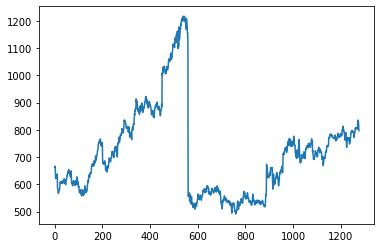

In [19]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [20]:
##LSTM are sesitive to the scale of the data. so we should use MinMax scaler

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [22]:
df1.shape

(1278, 1)

In [23]:
df1 #Converted into an array and has a value range from 0 to 1

array([[0.23757287],
       [0.24151427],
       [0.22878051],
       ...,
       [0.45768505],
       [0.42875846],
       [0.42113749]])

In [24]:
##Splitting the dataset into train and test
Training_size = int(len(df1)*0.80)
Test_size = len(df1)-Training_size
train_data,test_data = df1[0:Training_size,:],df1[Training_size:len(df1),:1]

In [25]:
Training_size,Test_size

(1022, 256)

In [26]:
len(train_data),len(test_data)

(1022, 256)

In [27]:
##Data Preprocessing
#In Time series data the data dependent on the previous data.
##For eg. trading done on 4/1/2012 depends on trading done on 3/1/2012 and so on
#We need to decide the timesteps- how many days need to get consider (day 3 will get calculated on day1 and day2)
#In the above example day 3 will be my dependednt feautre - similarly we need to split the data into dependent and independent features

In [28]:
# Convert an array of value into a dataset matrix
import numpy
def Dataset(Dataset,time_step=1): #Time step defines the number of the step we will take at a time
  dataX,dataY =[] , []
  for i in range(len(Dataset)-time_step-1):
    a = Dataset[i:(i+time_step),0]
    dataX.append(a)
    dataY.append(Dataset[i + time_step , 0])
  return numpy.array(dataX), numpy.array(dataY)


In [29]:
#Implementing the loop into Train and test data
#loop will run like : X=t,t+1,t+2,t+3 and Y will be t+4
#Next loop will start from t+1 and will go upto t+4 and Y will be t+5
import numpy as np
time_step = 100
X_train, Y_train = Dataset(train_data, time_step)
X_test, Y_test = Dataset(test_data, time_step)

In [30]:
print(X_train.shape), print(Y_train.shape) # Each record is having 100 data

(921, 100)
(921,)


(None, None)

In [31]:
print(X_test.shape), print(Y_test.shape)

(155, 100)
(155,)


(None, None)

In [32]:
# we need 3 dimentions to create the LSTM model so we need to reshape our X_train and X_test
#We can see in X_train 921 is the number of records, 100 is the time step we need one more dimentions therefor we will add 1
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)

In [33]:
##Create LSTM model
##Importing important Libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [34]:
##Adding First input layer
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1))) #Hidden layer given as 50# first 2 value will be X_train(100),1

In [35]:
##Adding one more layer
model.add(LSTM(50,return_sequences=True)) #We do not ave to define the value as this is the 2nd layer and input will be the last value of the 1 layer

In [36]:
#Adding one more final input layer
model.add(LSTM(50))

In [37]:
# Adding Output layer
model.add(Dense(1))

In [38]:
#Compiling the Model
model.compile(loss='mean_squared_error',optimizer = 'adam')

In [39]:
# Checking the summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [40]:
#Fitting the model
model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
15/15 [==============================] - 10s 95ms/step - loss: 0.0472 - val_loss: 0.0076
Epoch 2/100
15/15 [==============================] - 0s 18ms/step - loss: 0.0134 - val_loss: 0.0036
Epoch 3/100
15/15 [==============================] - 0s 17ms/step - loss: 0.0097 - val_loss: 7.6017e-04
Epoch 4/100
15/15 [==============================] - 0s 18ms/step - loss: 0.0080 - val_loss: 8.9513e-04
Epoch 5/100
15/15 [==============================] - 0s 17ms/step - loss: 0.0067 - val_loss: 6.5801e-04
Epoch 6/100
15/15 [==============================] - 0s 18ms/step - loss: 0.0063 - val_loss: 0.0011
Epoch 7/100
15/15 [==============================] - 0s 17ms/step - loss: 0.0061 - val_loss: 0.0031
Epoch 8/100
15/15 [==============================] - 0s 18ms/step - loss: 0.0062 - val_loss: 8.1327e-04
Epoch 9/100
15/15 [==============================] - 0s 17ms/step - loss: 0.0050 - val_loss: 5.5992e-04
Epoch 10/100
15/15 [==============================] - 0s 17ms/step - loss: 0.00

In [41]:
##Prediction
Train_predict = model.predict(X_train)
Test_predict = model.predict(X_test)

5/5 [==============================] - 0s 8ms/step


In [42]:
# We need to perform to perform scaler inverse transformation as we already scaled the data- Transform back to original
# Scaling is necessary because we need to find the RMSE value
Train_predict = scaler.inverse_transform(Train_predict)
Test_predict = scaler.inverse_transform(Test_predict)

In [43]:
#Calculate RMSE for test data
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(Y_test,Test_predict))

768.1343939318592

In [44]:
##Train data RMSE
math.sqrt(mean_squared_error(Y_train,Train_predict))

737.3247316922653

In [45]:
#We can see there is a differnce between Train and test RMSE but the difference is not much that means we could get a better prediction

In [46]:
# Since our time_step is 100 therefore predicting the value for 30 days we need to check for the 256-100=156
X_input = test_data[156:].reshape(1,-1)
X_input.shape

(1, 100)

In [47]:
#from keras.preprocessing.sequence import TimeseriesGenerator

In [48]:
#n_input = 100
#n_features =1
#generator = TimeseriesGenerator(X_train,X_train,length=n_input,batch_size = 1)

In [49]:
#Lets see how the genertor converted the data
#X,Y = generator[0]
#print(f'Given Array : \n{X.flatten()}')
#print(f'Predict this Y : \n{Y}')

In [50]:
#X.shape

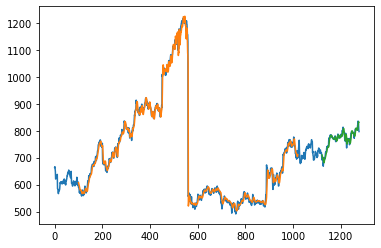

In [51]:
##Ploting
#Shift train prediction
look_back = 100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(Train_predict)+look_back,:]=Train_predict
#Shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(Train_predict)+(look_back*2)+1:len(df1)-1,:] = Test_predict
#Plot Baseline and prediction
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()
#Green line is test data prediction
#Orange line is the train data

In [52]:
#Predicting 30 days value
len(test_data)

256

In [53]:
# Since our time_step is 100 therefore predicting the value for 30 days we need to check for the 256-100=156
X_input = test_data[156:].reshape(1,-1)
X_input.shape

(1, 100)

In [54]:
temp_input=list(X_input)
temp_input=temp_input[0].tolist()

In [55]:
print(temp_input) #temp_input is basically all the test_data values

[0.3915494122348857, 0.36996816559403545, 0.3828673015173021, 0.370009508978405, 0.3738682248528864, 0.3866433306230448, 0.38267436572357805, 0.378291966980417, 0.3861609911387345, 0.39278971376596883, 0.4079351735733088, 0.40750795860149114, 0.3900197070132161, 0.4021470997615866, 0.40014883618373, 0.39112219726306785, 0.39426429447514577, 0.38774582087289655, 0.3930791174565549, 0.39313424196904756, 0.3936717059658503, 0.3912186651599301, 0.4061849703016689, 0.4022297865303255, 0.40646059286413183, 0.3955045960062291, 0.3959731543624161, 0.39794385568402646, 0.41902898171244307, 0.42762840566128735, 0.4213855546215013, 0.4246930253710568, 0.44362829541226256, 0.4361313617132698, 0.4242795915273625, 0.4191530118655513, 0.41918057412179754, 0.4042556123644281, 0.4029739674489754, 0.38242630541736156, 0.3733721042404532, 0.3732205118310985, 0.40147182448355223, 0.4124829458539476, 0.4053167592299105, 0.3739646927497484, 0.36219560933258, 0.33747226547965226, 0.36835577360362715, 0.37661

In [56]:
#demostrate prediction for next 30 days
#Explanation : First else part will run, overhere we are passing the (temp_input=100 values) and predicting the output
# we need to reshape the value- 
#You always have to give a three-dimensional array as an input to your LSTM network. Where the first dimension represents the batch size
#The second dimension represents the number of time-steps you are feeding a sequence.
#The third dimension represents the number of units in one input sequence
#y hat - in stats we denote this as Y^ which is the estimated value of the respose variable in a liner regression model.
#over here we simply take yhat as a varibale nameto estimate the value
#After getting the yhat value we simply add the yhat value inside the final output wiht the help of extend()
#extend - extend in python is a method that iterates over an iterable like string,list,tuple and add each element of the iterable to the end of the list,modifying the original list
#while iteration- we basically shifting one position therefore we have written the code if len(tem_input is greater than 100 we will shft 1 postition right and taking the new output) 
from numpy import array
list_output=[]
n_steps =100
i = 0
while (i<30):
  if len(temp_input)>100:
    print(temp_input)
    X_input=np.array(temp_input[1:])
    print("{} day input{}".format(i,X_input))
    X_input= X_input.reshape(1,-1)
    X_input = X_input.reshape((1,n_steps,1))
    print(X_input)
    yhat = model.predict(X_input,verbose=0)
    print("{} day output {}".format(i,yhat))
    temp_input.extend(yhat[0].tolist()) #Pandas tolist() is used to convert a series to list.
    temp_input=temp_input[1:]
    print(temp_input)
    list_output.extend(yhat.tolist())
    i=i+1
  else:
    X_input = X_input.reshape((1,n_steps,1))
    yhat = model.predict(X_input,verbose=0)
    print(yhat[0])
    temp_input.extend(yhat[0].tolist())
    print(len(temp_input))
    list_output.extend(yhat.tolist())
    i = i+1
  print(list_output)






[0.43261272]
101
[[0.43261271715164185]]
[0.3915494122348857, 0.36996816559403545, 0.3828673015173021, 0.370009508978405, 0.3738682248528864, 0.3866433306230448, 0.38267436572357805, 0.378291966980417, 0.3861609911387345, 0.39278971376596883, 0.4079351735733088, 0.40750795860149114, 0.3900197070132161, 0.4021470997615866, 0.40014883618373, 0.39112219726306785, 0.39426429447514577, 0.38774582087289655, 0.3930791174565549, 0.39313424196904756, 0.3936717059658503, 0.3912186651599301, 0.4061849703016689, 0.4022297865303255, 0.40646059286413183, 0.3955045960062291, 0.3959731543624161, 0.39794385568402646, 0.41902898171244307, 0.42762840566128735, 0.4213855546215013, 0.4246930253710568, 0.44362829541226256, 0.4361313617132698, 0.4242795915273625, 0.4191530118655513, 0.41918057412179754, 0.4042556123644281, 0.4029739674489754, 0.38242630541736156, 0.3733721042404532, 0.3732205118310985, 0.40147182448355223, 0.4124829458539476, 0.4053167592299105, 0.3739646927497484, 0.36219560933258, 0.337472

In [57]:
len(df1)

1278

In [58]:
new_day = np.arange(1,101)
pred_day = np.arange(101,131) #we are doing a prediction of 30 days

In [59]:
import matplotlib.pyplot as plt

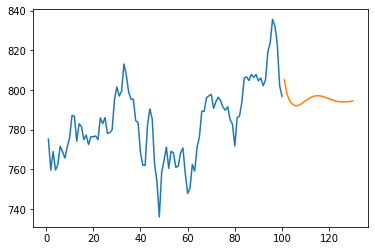

In [60]:
plt.plot(new_day,scaler.inverse_transform(df1[1178:])) #since the df1 lenght is 1278 and we have taken the previous 100 days data to do the future prediction
plt.plot(pred_day,scaler.inverse_transform(list_output))
# the orange line denotes the prediction of 30 days

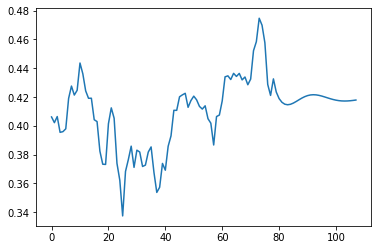

In [61]:
#if we add df2 to df1 we will get a continious graph dipicted  
df2 = df1.tolist()
df2.extend(list_output)
plt.plot(df2[1200:])